<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, "section");
        if (section) {
            section.setAttribute("data-background-image", src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<script>
    setBackgroundImage("/Users/pavanchaggar/Documents/ResearchDocs/Presentations/background_imgs/title-slide-background_cropped.png");
</script>

<h1 style="color:White;">Research Proposal</h1>
<h2 style="color:White;" >Pavan Chaggar</h2>
<h3 style="color:White;" >
                          DPhil Student <br>
                          Mathematical Institute <br>
                          University of Oxford</h3>


# Outline 

* Background
* Rotation 1
* Rotation 2
* Intended Future Work

# Background



Alzheimer's Disease (AD) is a neurological disorder characterised by progressove structural brain damage and cognitive decline. Toxic forms of two proteins are thought to underly the progression of AD: Amyloid-$\beta$ and $\tau$-protein. 

Evidence suggest these proteins exhibit prion-like properties, namely their ability to induce misfolding in their surrounding counterparts. This property begets the ability of toxic A$\beta$ and $\tau$P to propogate through the brain. 

Additionally, A$\beta$ and $\tau$P have been shown to have a characteristic spread through the brain. $\tau$P, in particular, is correlated with progression of atrophy in the brain.

These predictable properties show potential to be used as a clinilcal biomarker for the progression of AD. 

<img align="top" width="700" height="400" src="juckerwalker_staging.png">


<img align="top" width="700" height="400" src="juckerwalker_tau.png">
<img align="top" width="700" height="400" src="matusda_atrophy.png">

# Summary of Rotation Work

Increasingly sophisticated mathematical models have captured toxic protein diffusion through the brain. These are typically of two flavours: ODE models or probabilistic models. 

Some modelling work has provided correlative analyses between simulated protein spread, atrophy from sMRI [1] and patient PET [2]. However, these models are either simple linear ODE models or probabilstic models that do not provide mechanistic insights.

Augmented model such as FKPP equation or heterodimer models offer a richer explanation of how dynamics between prion-like proteins _causes_ AD pathology. However, with growing model complexity, rigourous comparison with data becomes more difficult. 

This is the central problem that motivates the research programme of this DPhil. 

## Mathematical Models

Models of toxic protein propogation focus on (reaction-)diffusion ordinary differential equation models. The simplest of which is the network diffusion equation: 
 
$$ \frac{d\mathbf{p}}{dt} = -k\mathcal{L}\mathbf{p} $$

This only descibes diffusion on a network. To include some description of prion-like dynamics, we can augment the heat equation with a logsitic growth term: 

$$ \frac{d\mathbf{p}_{i}}{dt} = -k\sum_{j=1}^{N}\mathcal{L}_{ij} \mathbf{p}_j + \alpha \mathbf{p}_i(1 - \mathbf{p}_i) $$

and we can add additional complexity by considering interactions between healthy and and toxic proteins.

\begin{align}
    \frac{d\mathbf{p}_{i}}{dt} & =  -\rho\sum\limits_{j=1}^{N}\mathcal{L}_{ij}\mathbf{p}_j +  k_0 - k_1 \mathbf{p}_i - k_{12}\mathbf{p}_i \mathbf{\hat{p}}_i, \\
    \frac{d\mathbf{\hat{p}}_i}{dt} &= -\hat{\rho}\sum\limits_{j=1}^{N}\mathcal{L}_{ij}\mathbf{\hat{p}}_j - \hat{k}_1 \mathbf{\hat{p}}_i + k_{12}\mathbf{p_i}\mathbf{\hat{p}_i}
\end{align}

<img width="700" height="400" src="goriely_fkpp-hxd.png">

## Data Analysis and Representation

I conducted a pilot analysis on ADNI subjects who had structural MRI, A$\beta$ and $\tau$P PET. 

Using a standard data processing pipeline in SPM, I analysed the sMRI and PET data for the four groups: young cognitively normal (sMRI only), old cognitively normal, late MCI, early AD. 

The results of these analyses were summarised on a connectome to facilitate comparison with connectome network simulations.

##### Atrophy and Diffusion Maps on the Connectome
<img align="top" width="700" height="400" src="connectome_maps.png">

## Inference

Now that we have models and data, we need a method to bring them together. Where as previous studies have opted for correlative analysis, we aim to fit a full generative model of the data and model within a Bayesian framework.

This will allow us to obtain data-derived parameter estimates and gain insight into model uncertainty and identifiability.

We initially test this using variational Bayesian analysis. 

<img align="left" width="400" height="700" src="forward_results.png">
<img align="right" width="400" height="700" src="inference_results.png">



# Intended Future Work

The majority of work over the coming year will revolve around implementing the Bayesian inference machinary necessary to evaluate the mathematical models.

At present, I am testing the robustness of the analytic variational Bayes implementation. However, there are various downsides to this, namely, that it requires many assumptions about the data. 

After testing the analyical method, I plan to explore stochastic variational bayes using automatic differentiation and likelihood-free based methods. These place fewer constraints on the generative model and could offere greater robustness against sparse data.

In addition, since we are looking to infer values are different levels of resolution, I hope to implement a multiscale/multigrid method of inference that uses a hyrbid of methods for efficient and accurate computation.

We plan to package this within an open source software framework that facilitate macroscale brain network modelling and inference. The goal within the next year is to publish a software paper and application paper of this software. 

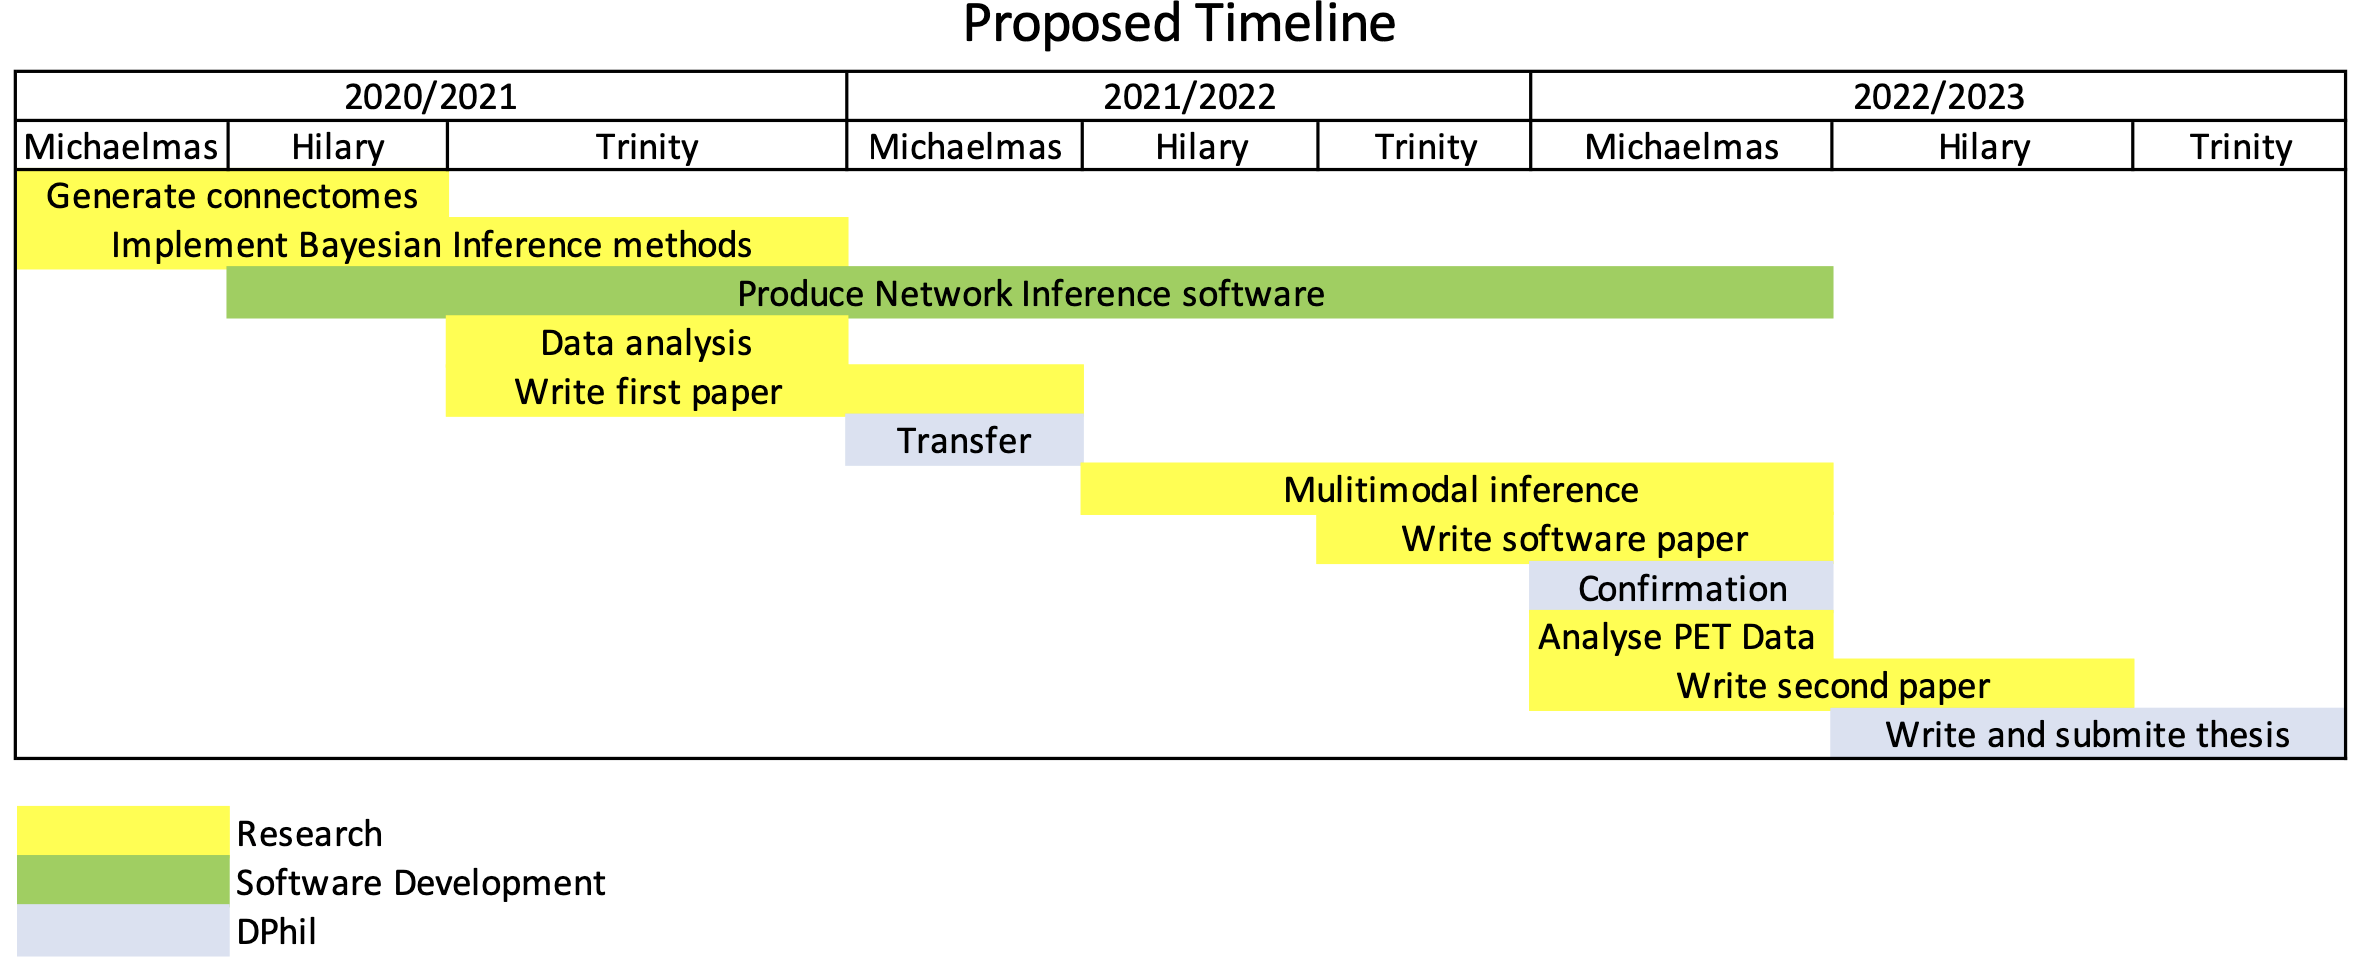

### References: 
[1]: Raj A, LoCastro E, Kuceyeski A, Tosun D, Relkin N, Weiner M, (ADNI ADNI, et al. Network diffusion model of progression predicts longitudinal patterns of atrophy and metabolism in Alzheimer’s disease. Cell reports. 2015; 10(3):359–369. 

[2] Jacob W Vogel, Yasser Iturria-Medina, Olof T Strandberg, Ruben Smith, Elizabeth Levitis, Alan C Evans, and Oskar Hansson. Spread of patho- logical tau proteins through communicating neurons in human alzheimer’s disease. Nature Communications, 11(1):1–15, 2020.

Walker,  L.C.,  Jucker,  M.:  Neurodegenerative  diseases:  expanding  the  prion  concept.Annual review of neuroscience38, 87–103 (2015

H Matusda. Voxel-based Morphometry of Brain MRI in Normal Aging and Alzheimer’s Disease, Aging Dis. 2013 Feb; 4(1): 29–37

Fornari S, Schäfer A, Jucker M, Goriely A, Kuhl E. Prion-like spreading of Alzheimer’s disease within the brain’s connectome. Journal of the Royal Society Interface. 2019; 16(159):20190356